**EVALUACIÓN FINAL: PREDICCIÓN DE NATALIDAD SEGÚN FACTORES SOCIOECONÓMICOS**

Eres parte de un equipo de investigación en demografía y te han solicitado desarrollar un modelo basado en redes neuronales para predecir la tasa de natalidad en distintos países. Para ello, contarás con un dataset que incluye información socioeconómica como el PIB per cápita, el acceso a servicios de salud, la tasa de educación y otros factores relevantes.
Tu objetivo es diseñar, entrenar y evaluar una red neuronal que permita predecir la tasa de natalidad de manera precisa, analizando el impacto de diferentes variables en la predicción.

**OBJETIVOS DE LA EVALUACIÓN**
1. Diseñar y entrenar una red neuronal para resolver un problema de regresión.
2. Aplicar conocimientos sobre funciones de activación, optimizadores, y estrategias para prevenir sobreajuste.
3. Evaluar y comparar los resultados obtenidos con diferentes configuraciones de la red.
4. Analizar la influencia de cada variable en la predicción y extraer conclusiones sobre patrones socioeconómicos globales.

**INSTRUCCIONES**
1. Carga y exploración de datos (1 punto)
* Carga el dataset proporcionado, que contiene información de distintos países sobre:
  * PIB per cápita
  * Acceso a servicios de salud (% de la población) o Nivel educativo promedio
  * Tasa de empleo femenino
  * Edad promedio de maternidad
  * Índice de urbanización
  * Tasa de natalidad (variable objetivo)
  * Analiza las correlaciones entre variables y visualiza su distribución.
2. Diseño y entrenamiento del modelo (5 puntos)
* Diseña una red neuronal con la siguiente estructura:
  * Capa de entrada con tantas neuronas como variables predictoras.
  * Mínimo de 2 capas ocultas con activaciones adecuadas.
  * Capa de salida con una neurona para predecir la tasa de natalidad.
* Aplica diferentes funciones de activación y evalúa su impacto.
* Utiliza optimizadores adecuados y experimenta con diferentes valores de learning rate.
* Aplica regularización (dropout o L2) para evitar el sobreajuste.
* Entrena el modelo utilizando una función de pérdida adecuada para problemas de regresión.
3. Evaluación y optimización del modelo (3 puntos)
* Evalúa el modelo con datos de prueba.
* Ajusta hiperparámetros para mejorar el rendimiento.
* Analiza el impacto de cada variable en la predicción.
* Realiza predicciones con el modelo y compáralas con datos reales.
4. Análisis de resultados y reflexión final (1 punto)
* Explica qué variables resultaron más influyentes en la predicción de la natalidad.
* Relaciona los resultados con tendencias demográficas globales.
* Propón mejoras o ajustes para futuras versiones del modelo.

In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import csv
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import callbacks, optimizers, regularizers
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings(
    "ignore",
    message=r"Do not pass an `input_shape`/`input_dim` argument to a layer.",
    category=UserWarning,
    module="keras"
)


In [2]:
# Paso 2: Cargar y preprocesar el .csv
print("Cargando los datos...")

# ==============================
# 1. CARGA DE LOS DATOS
# ==============================

files.upload()
archivo_csv = 'dataset_natalidad.csv'

#leer archivo .csv
with open(archivo_csv, 'r', encoding='utf-8') as f:
    sample = f.read(2048)
    dialect = csv.Sniffer().sniff(sample)

df = pd.read_csv(archivo_csv, sep=dialect.delimiter)

df.isnull().sum()

df


Cargando los datos...


Saving dataset_natalidad.csv to dataset_natalidad.csv


,País,PIB_per_capita,Acceso_Salud,Nivel_Educativo,Tasa_Empleo_Femenino,Edad_Maternidad,Urbanizacion,Tasa_Natalidad
0,País_1,25599.706537,51.571459,14.630475,32.584086,21.546858,71.889703,38.613409
1,País_2,57289.286853,81.820521,6.262099,56.567732,33.538294,62.165782,19.211764
2,País_3,45259.666800,65.717799,7.424431,57.031756,27.578786,48.571657,26.556891
3,País_4,37926.216631,75.428535,18.478313,61.871495,32.396862,78.827701,29.177172
4,País_5,13581.025224,95.378324,14.096436,66.304567,24.800744,71.083870,40.000000
...,...,...,...,...,...,...,...,...
95,País_96,32158.757800,67.460479,12.833649,76.537866,25.300283,58.437698,35.553741
96,País_97,33750.305616,86.297784,16.549903,72.920638,28.754842,70.053464,35.258392
97,País_98,28514.756010,94.855513,8.237315,51.449701,21.166020,40.339192,35.589872
98,País_99,6398.051971,94.354321,14.343357,67.543553,34.615922,41.537341,40.000000


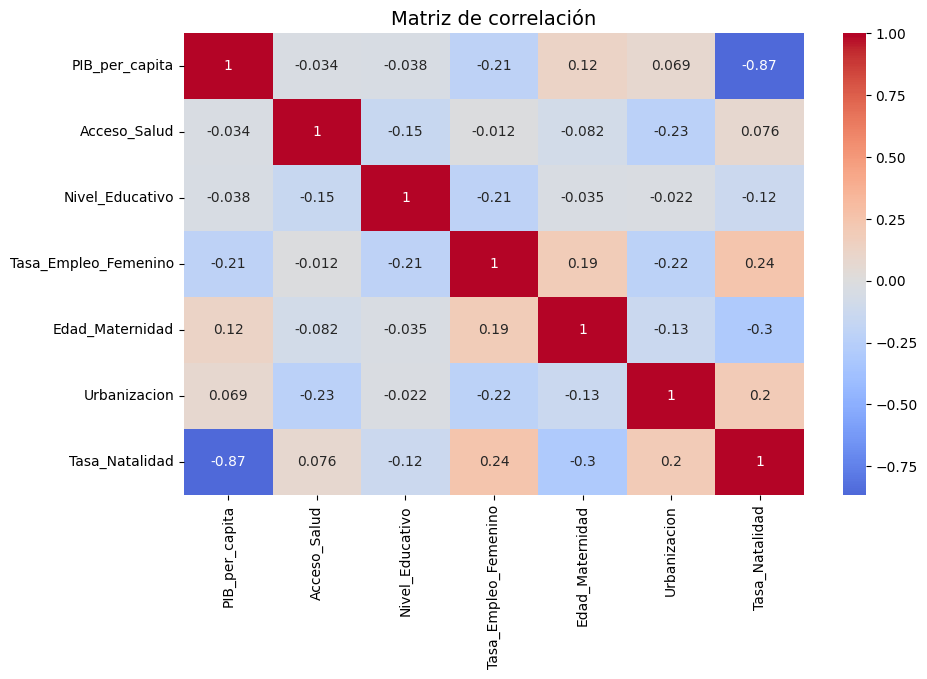

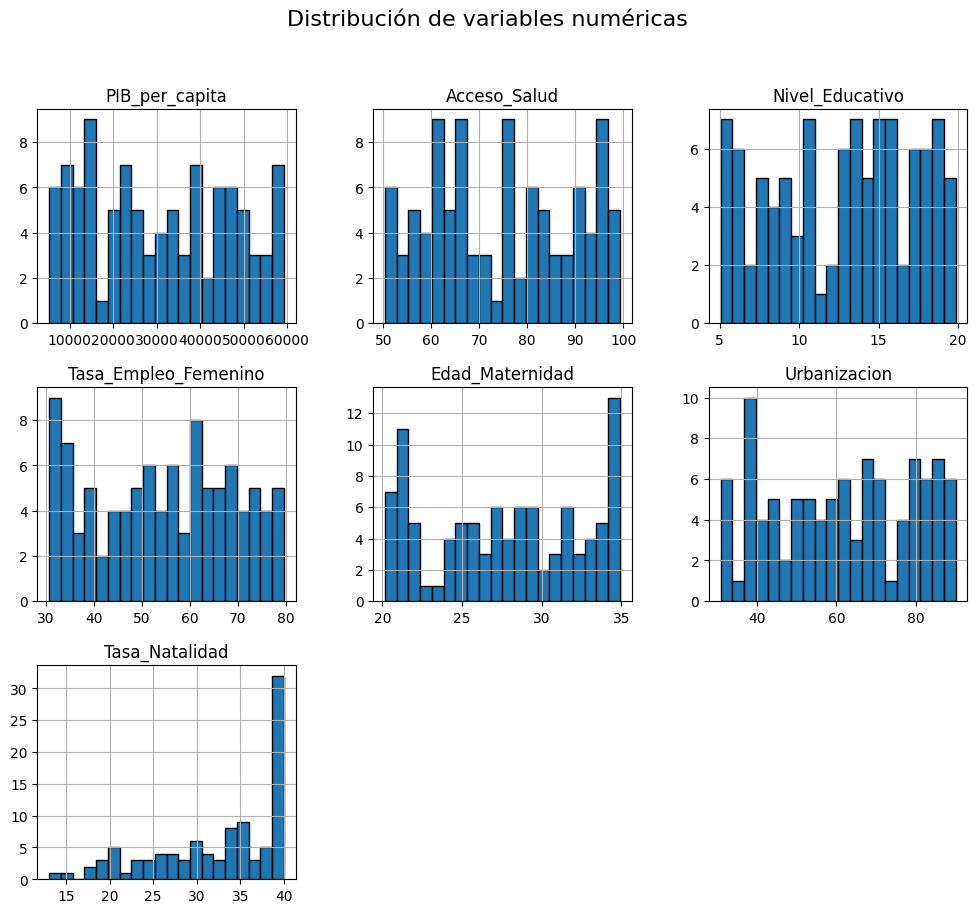

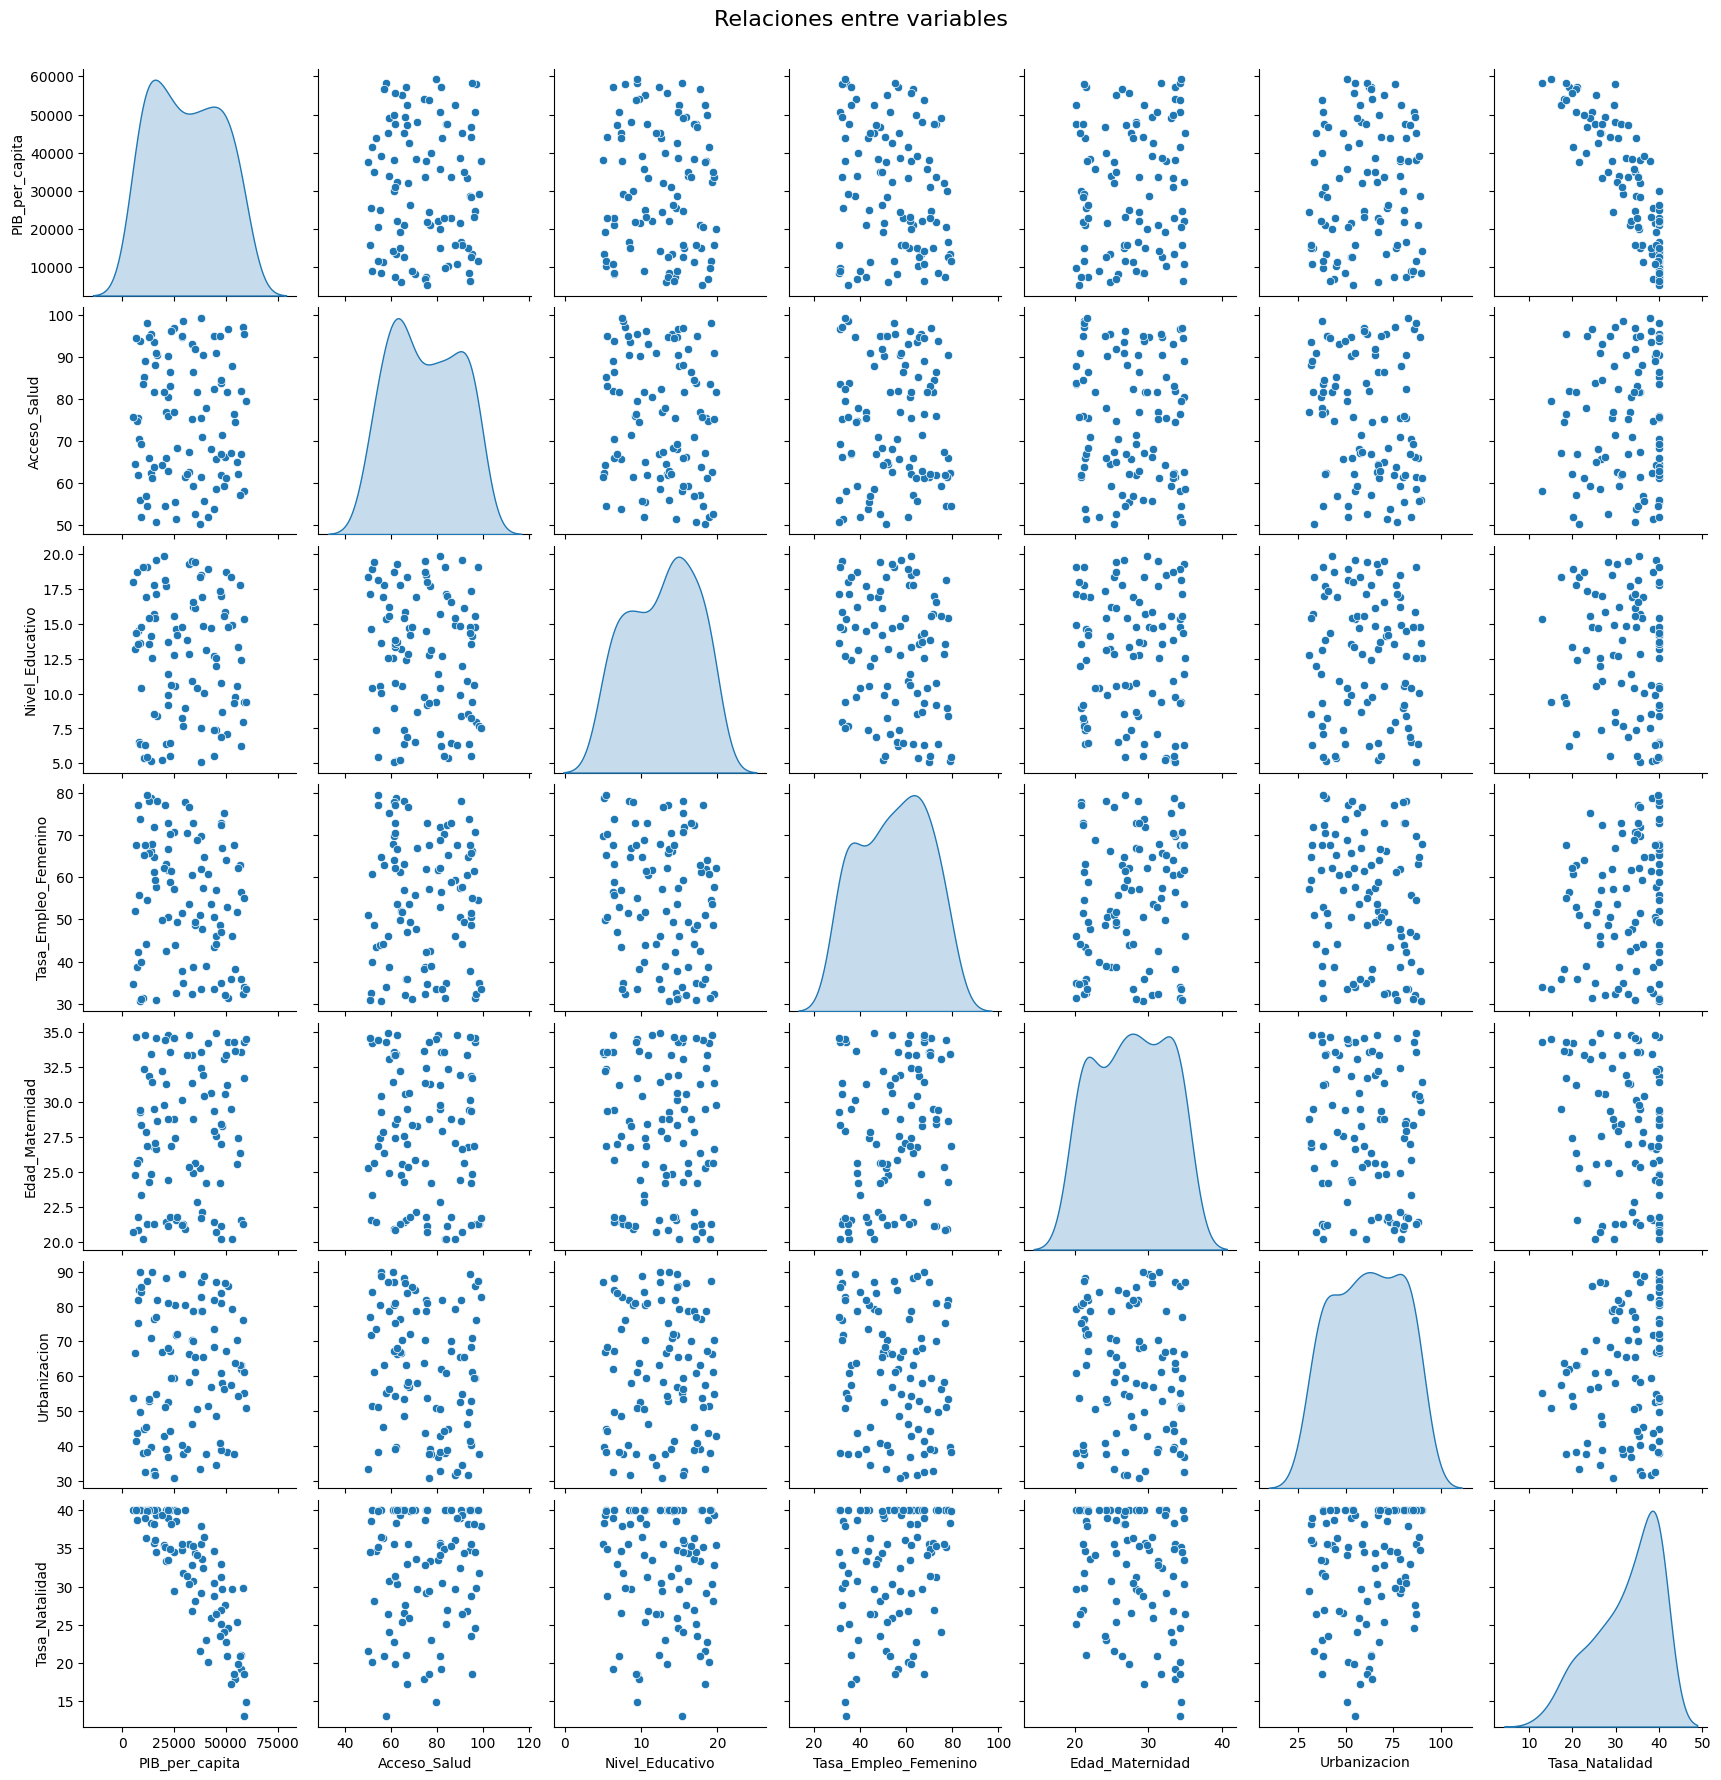

In [3]:
# --- 1. Ver correlaciones entre variables numéricas ---
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación", fontsize=14)
plt.show()

# --- 2. Distribución de todas las variables numéricas ---
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

# --- 3. Pares de variables (scatter plots) ---
sns.pairplot(df, diag_kind="kde")
plt.suptitle("Relaciones entre variables", y=1.02, fontsize=16)
plt.show()

La **Matriz de correlacion** muestra que el factor que tiene la influencia positiva mas marcada en la tasa de natalidad es la tasa de empleo femenino, seguido por la variable urbanizacion y en tercer lugar el acceso a la salud.

El resto de las variable se muestran inversamente proporcionales, siendo el PIB el factor que mas incide negativamente en dicha tasa.


In [63]:
# ==============================
# 2. PREPROCESAMIENTO DE LOS DATOS
# ==============================
print("Preprocesando los datos...")

X = df.drop(columns = ["Tasa_Natalidad", "País"])# Variables independientes
y = df["Tasa_Natalidad"]# Variable dependiente
feature_names = list(X.columns)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

print("Datos preparados y escalados...")

Preprocesando los datos...
Datos preparados y escalados...



🔹 Entrenando con activación=relu, opt=adam, lr=0.001, dropout=False, l2=False
MAE = 3.6602


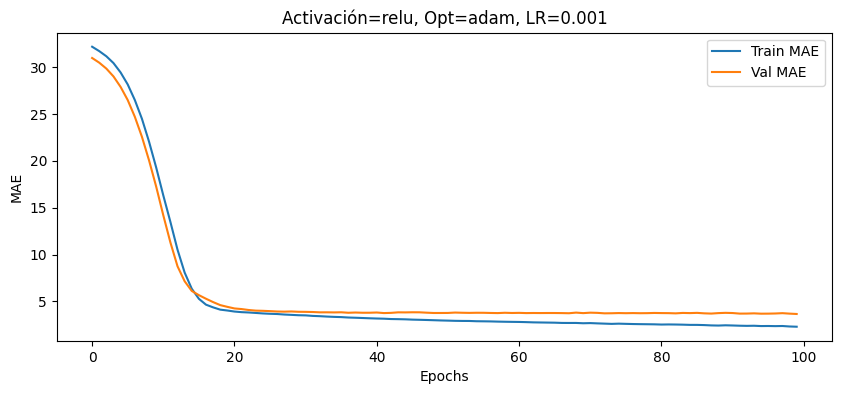


🔹 Entrenando con activación=tanh, opt=adam, lr=0.001, dropout=False, l2=False
MAE = 1.7309


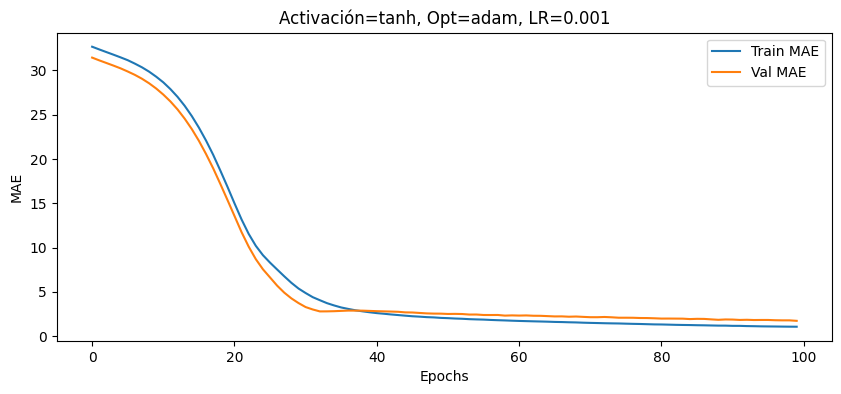


🔹 Entrenando con activación=elu, opt=adam, lr=0.001, dropout=False, l2=False
MAE = 2.1000


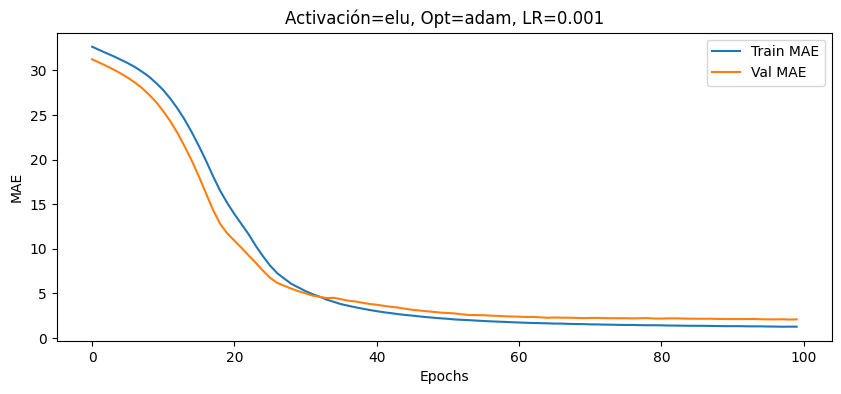


🔹 Entrenando con activación=relu, opt=adam, lr=0.001, dropout=True, l2=False
MAE = 3.4703


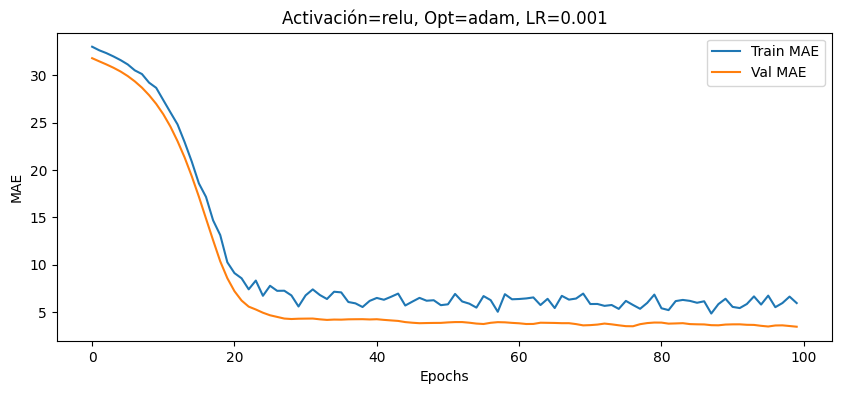


🔹 Entrenando con activación=tanh, opt=adam, lr=0.001, dropout=True, l2=False
MAE = 1.8615


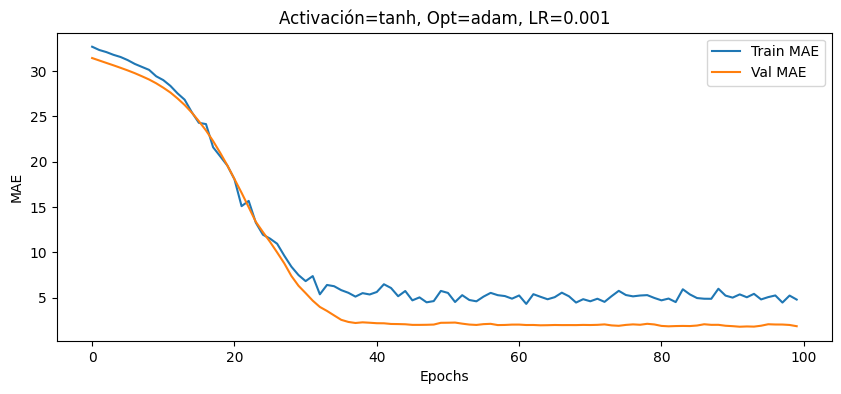


🔹 Entrenando con activación=elu, opt=adam, lr=0.001, dropout=True, l2=False
MAE = 1.5062


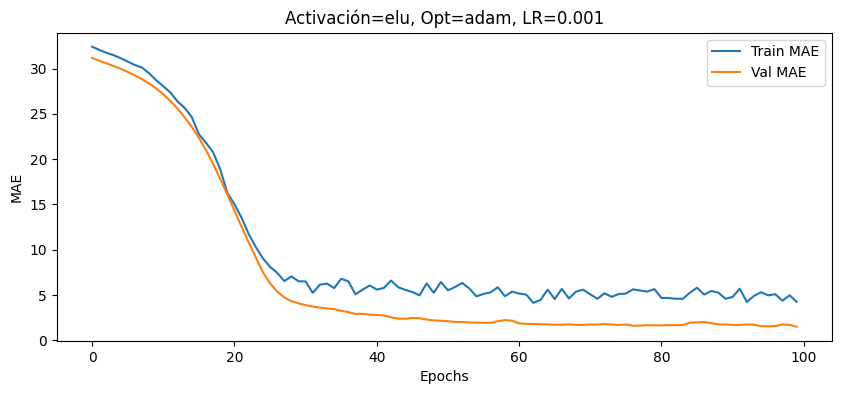


🔹 Entrenando con activación=relu, opt=rmsprop, lr=0.001, dropout=False, l2=False
MAE = 3.3894


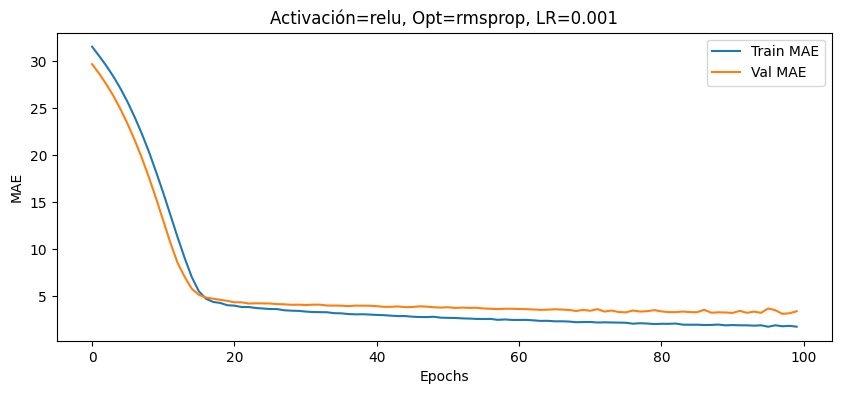


🔹 Entrenando con activación=relu, opt=sgd, lr=0.01, dropout=False, l2=False
MAE = 7.6564


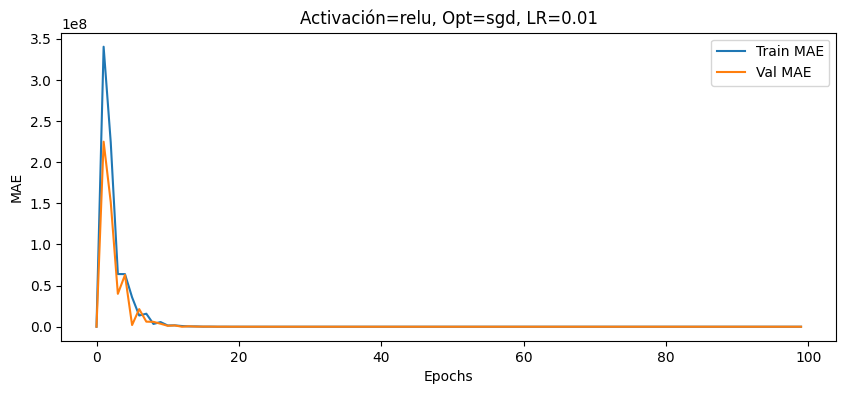


🔹 Entrenando con activación=relu, opt=adam, lr=0.001, dropout=True, l2=False
MAE = 4.0303


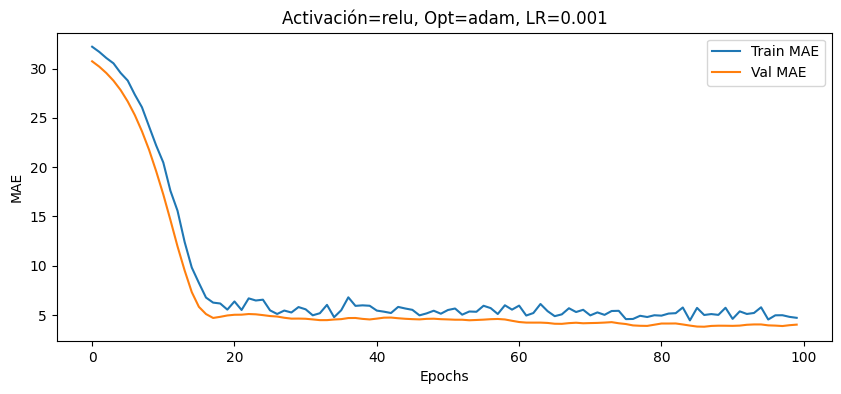


🔹 Entrenando con activación=relu, opt=adam, lr=0.001, dropout=False, l2=True
MAE = 3.5182


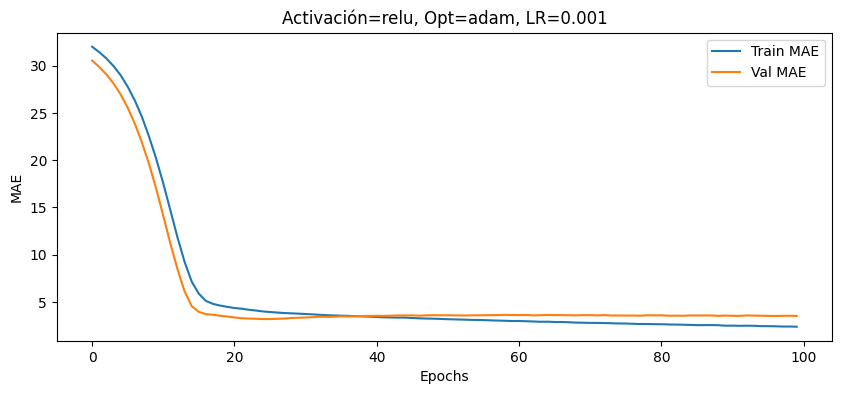

<Sequential name=sequential_72, built=True>

In [46]:
#=====================================
# COMPARACION DE MODELOS
#=====================================

# --- Función para crear modelos con diferentes configuraciones ---
def build_model(activation="relu", optimizer="adam", lr=0.001, use_dropout=False, use_l2=False):
    model = Sequential()

    # 1ª capa oculta
    model.add(Dense(
        64, activation=activation, input_shape=(X_train.shape[1],),
        kernel_regularizer=regularizers.l2(lr) if use_l2 else None
    ))
    if use_dropout:
        model.add(Dropout(0.05))  # Dropout 5%

    # 2ª capa oculta
    model.add(Dense(
        32, activation="relu",
        kernel_regularizer=regularizers.l2(lr) if use_l2 else None
    ))
    if use_dropout:
        model.add(Dropout(0.3))

    # Capa de salida
    model.add(Dense(1, activation="linear"))  # salida continua

    # Selección de optimizador con learning rate
    if optimizer == "adam":
        opt = Adam(learning_rate=lr)
    elif optimizer == "rmsprop":
        opt = RMSprop(learning_rate=lr)
    elif optimizer == "sgd":
        opt = SGD(learning_rate=lr, momentum=0.9)
    else:
        raise ValueError("Optimizador no soportado")

    # Compilación
    model.compile(optimizer=opt, loss="mse", metrics=["mae"])
    return model

# --- Entrenar modelo con configuración dada ---
def train_and_evaluate(activation, optimizer, lr, use_dropout, use_l2, epochs=100):
    print(f"\n🔹 Entrenando con activación={activation}, opt={optimizer}, lr={lr}, dropout={use_dropout}, l2={use_l2}")
    model = build_model(activation, optimizer, lr, use_dropout, use_l2)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs, batch_size=8, verbose=0
    )

    # Evaluación
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"MAE = {mae:.4f}")

    # Graficar curvas de entrenamiento
    plt.figure(figsize=(10,4))
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title(f"Activación={activation}, Opt={optimizer}, LR={lr}")
    plt.xlabel("Epochs")
    plt.ylabel("MAE")
    plt.legend()
    plt.show()

    return model

# --- Ejemplos de experimentación ---
# 1. Cambiar funciones de activación
train_and_evaluate(activation="relu", optimizer="adam", lr=0.001, use_dropout=False, use_l2=False)
train_and_evaluate(activation="tanh", optimizer="adam", lr=0.001, use_dropout=False, use_l2=False)
train_and_evaluate(activation="elu", optimizer="adam", lr=0.001, use_dropout=False, use_l2=False)
train_and_evaluate(activation="relu", optimizer="adam", lr=0.001, use_dropout=True, use_l2=False)
train_and_evaluate(activation="tanh", optimizer="adam", lr=0.001, use_dropout=True, use_l2=False)
train_and_evaluate(activation="elu", optimizer="adam", lr=0.001, use_dropout=True, use_l2=False)

# 2. Cambiar optimizadores y learning rates
train_and_evaluate(activation="relu", optimizer="rmsprop", lr=0.001, use_dropout=False, use_l2=False)
train_and_evaluate(activation="relu", optimizer="sgd", lr=0.01, use_dropout=False, use_l2=False)

# 3. Regularización
train_and_evaluate(activation="relu", optimizer="adam", lr=0.001, use_dropout=True, use_l2=False)
train_and_evaluate(activation="relu", optimizer="adam", lr=0.001, use_dropout=False, use_l2=True)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1121.4718 - mae: 32.7899 - val_loss: 1062.4495 - val_mae: 31.5357
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1137.9974 - mae: 33.1280 - val_loss: 1042.6812 - val_mae: 31.2182
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1061.2682 - mae: 31.9377 - val_loss: 1024.2555 - val_mae: 30.9240
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1040.8113 - mae: 31.5740 - val_loss: 1005.4857 - val_mae: 30.6223
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1038.6627 - mae: 31.5547 - val_loss: 986.4678 - val_mae: 30.3220
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1057.8732 - mae: 31.8795 - val_loss: 967.3418 - val_mae: 30.0171
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1049.3605 - mae: 31.6815 - val_loss: 946.5711 - val_mae: 29.6904
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 983.6526 - mae: 30.6026 - val_loss: 924.0296 - val_mae: 29.3374
Epoc

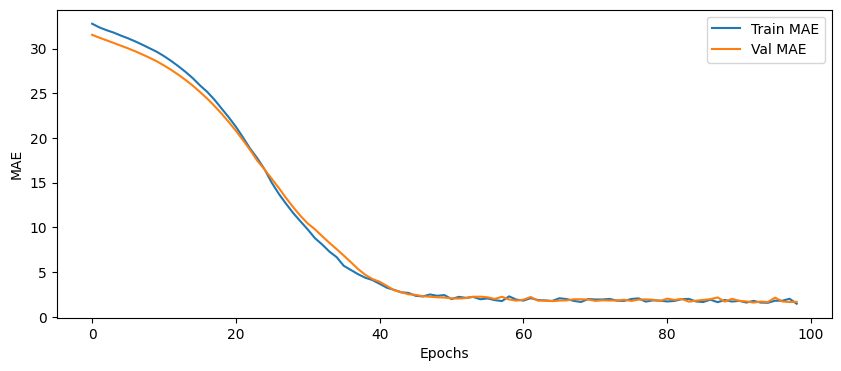

In [50]:
#=====================================
# PERFORMANCE CON MODELO SELECCIONADO
#=====================================


mod = Sequential([
                    Dense(64, activation = "elu", input_shape = (X_train.shape[1],)),
                    Dropout(0.05),
                    Dense(32, activation = "relu", kernel_regularizer=regularizers.l2(0.001)),
                    Dense(1, activation = "linear")
                    ])

mod.compile(optimizer = "rmsprop", loss = "mse", metrics = ["mae"])

callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



historial = mod.fit(X_train, y_train,
                       epochs=100,
                       batch_size=8,
                       validation_data=(X_test, y_test),
                       callbacks=[callback],
                       verbose=1)
# Graficar curvas de entrenamiento
plt.figure(figsize=(10,4))
plt.plot(historial.history['mae'], label='Train MAE')
plt.plot(historial.history['val_mae'], label='Val MAE')
#plt.title(f"Activación={activation}, Opt={optimizer}, LR={lr}")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()



Test MAE=1.6939 | RMSE=2.0016 | R2=0.9443


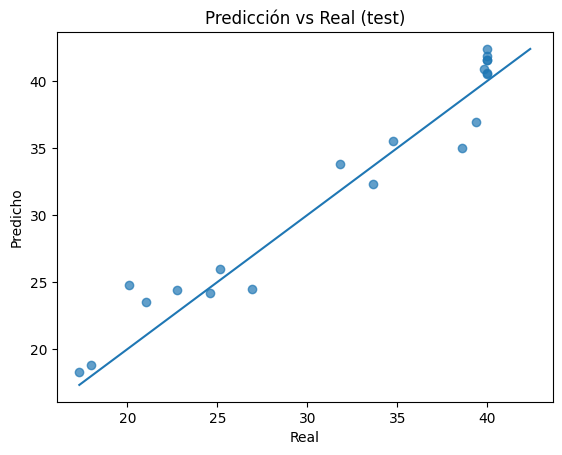

               variable  importance_mean  importance_std
0        PIB_per_capita         5.164851        0.756606
1          Urbanizacion         1.377828        0.283207
2       Edad_Maternidad         0.664112        0.249857
3  Tasa_Empleo_Femenino         0.291516        0.179834
4       Nivel_Educativo         0.240030        0.133010
5          Acceso_Salud         0.072379        0.138640


In [64]:
# =========================
# Escalado de features
# =========================
if hasattr(X_train, "columns"):
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train.values)
    X_test_s  = scaler.transform(X_test.values)
else:
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s  = scaler.transform(X_test)


# ==================================================
# Predicciones y comparación con datos reales
# ==================================================
y_pred = mod.predict(X_test_s, verbose=0).ravel()

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)
print(f"Test MAE={mae:.4f} | RMSE={rmse:.4f} | R2={r2:.4f}")

compare_df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
compare_df.to_csv("pred_vs_real_test.csv", index=False)

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Real"); plt.ylabel("Predicho"); plt.title("Predicción vs Real (test)")
lo, hi = float(min(np.min(y_test), np.min(y_pred))), float(max(np.max(y_test), np.max(y_pred)))
plt.plot([lo, hi], [lo, hi])
plt.show()

# =========================================
# Impacto de variables (permutación)
# Mide ↑MAE al permutar cada columna.
# =========================================
def permutation_importance(model, X, y, feature_names, n_repeats=10, random_state=42):
    rng = np.random.default_rng(random_state)
    base_pred = model.predict(X, verbose=0).ravel()
    base_mae  = mean_absolute_error(y, base_pred)

    imps = []
    for j, name in enumerate(feature_names):
        drops = []
        for _ in range(n_repeats):
            Xp = X.copy()
            Xp[:, j] = rng.permutation(Xp[:, j])
            yp = model.predict(Xp, verbose=0).ravel()
            drops.append(mean_absolute_error(y, yp) - base_mae)
        imps.append((name, float(np.mean(drops)), float(np.std(drops))))

    imp_df = pd.DataFrame(imps, columns=["variable","importance_mean","importance_std"])
    imp_df = imp_df.sort_values("importance_mean", ascending=False).reset_index(drop=True)
    return imp_df

imp_df = permutation_importance(mod, X_test_s, y_test, feature_names, n_repeats=10)
print(imp_df.head(10))


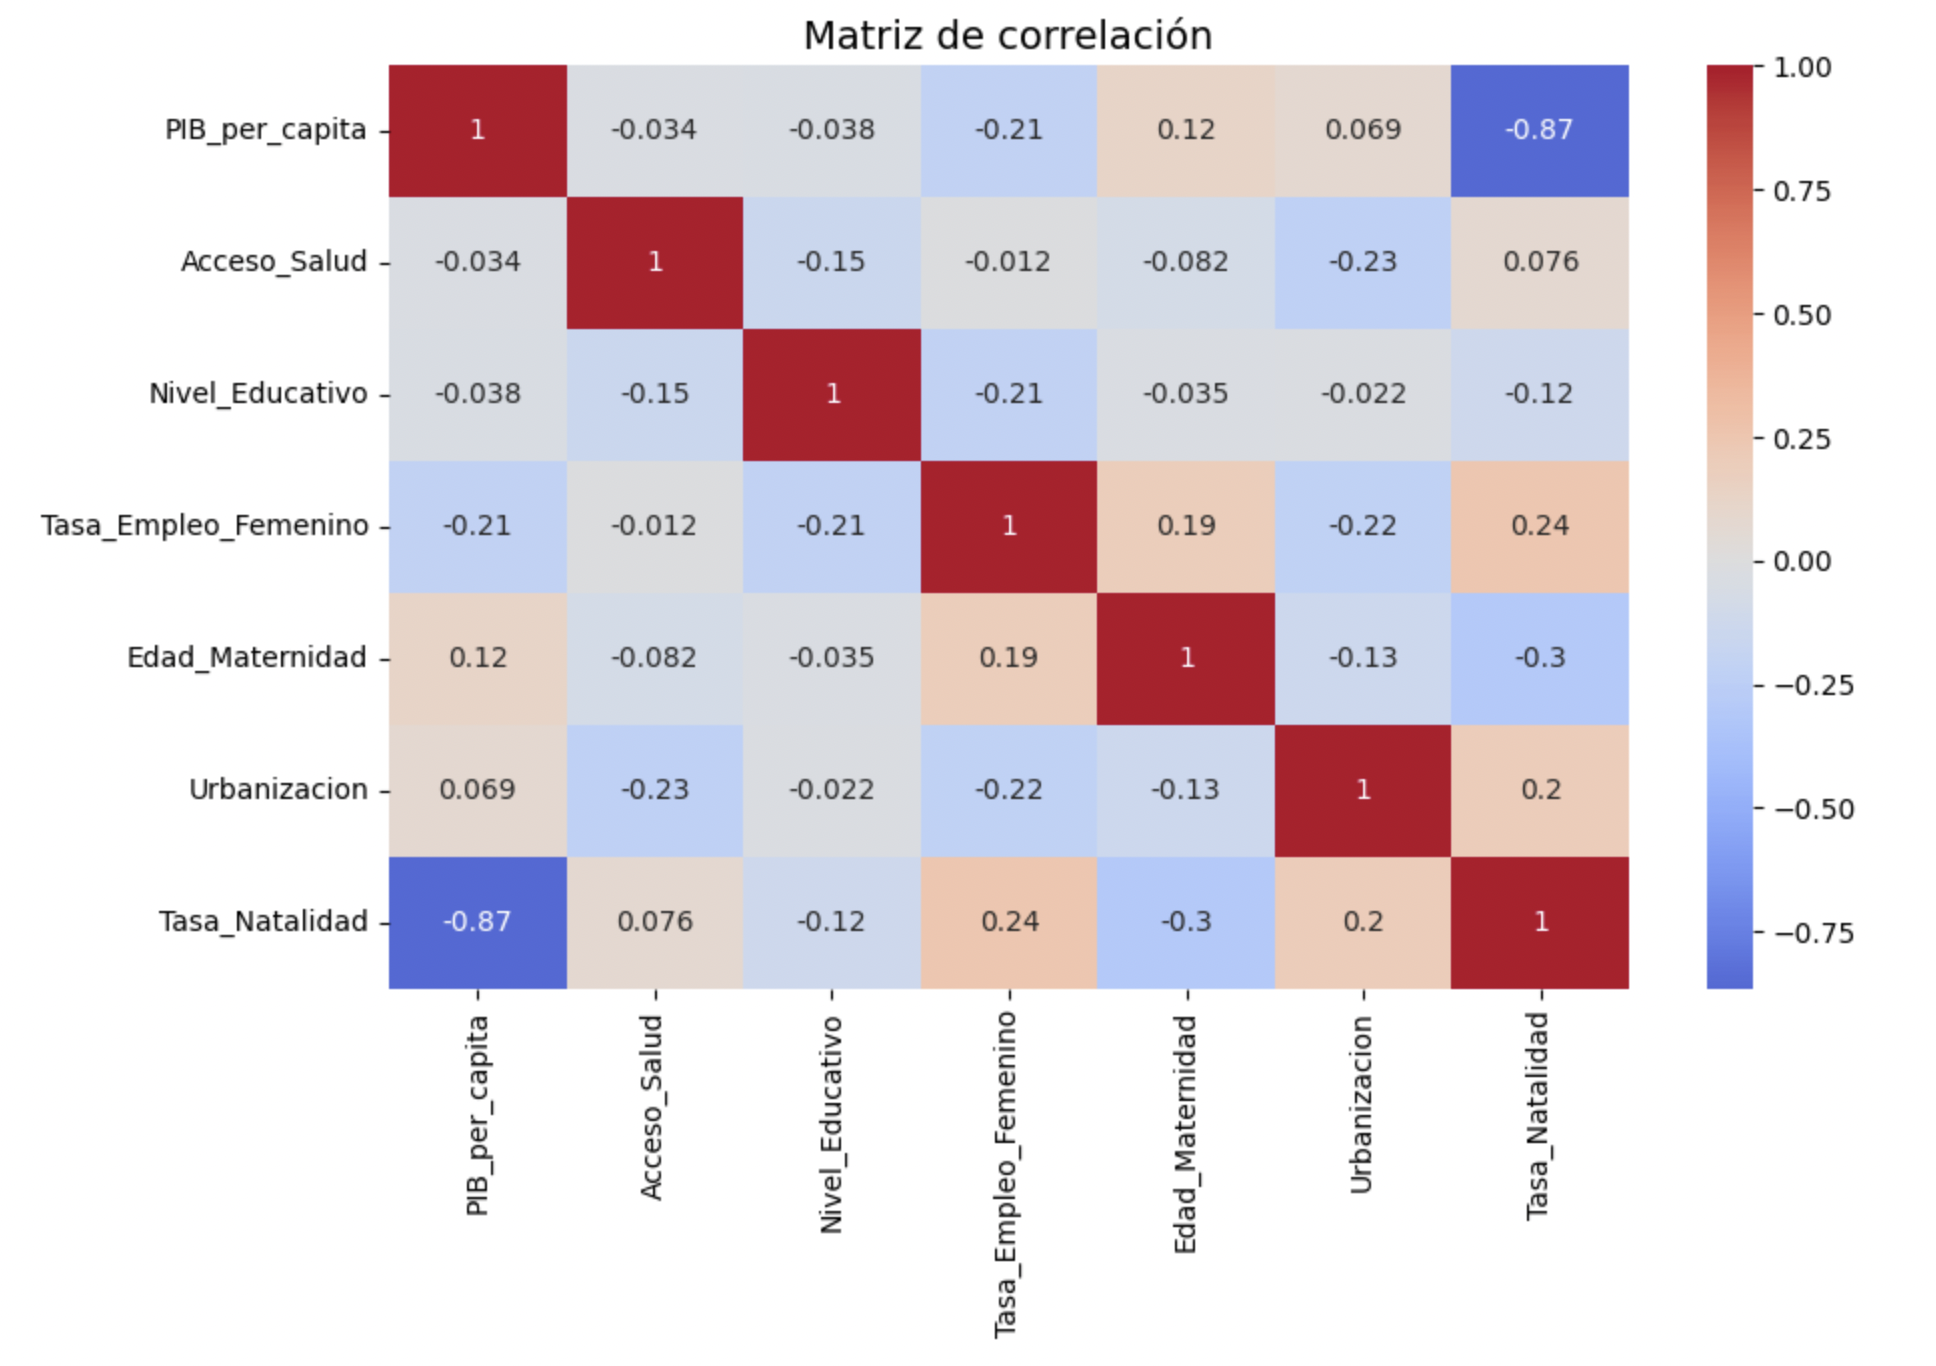

# **Análisis**

El testeo del modelo indica valores de:

**MAE=1.6939 | RMSE=2.0016 | R2=0.9443**

Esto indica que las predicciones se desvían solo 1.69 unidades de la media y el error cuadrático medio muestra que hay algunos outliers pero que en definitiva no afectan de manera significativa el desempeño general del modelo.
Adicionalente, el modelo explica un 94.45% de los casos, lo que podría sugerir que se trata de un modelo bastante sólido.

El mayor impacto o influencia lo tiene la variable **PIB_per_capita** (5.16 ± 0.76). Es la que mas sostiene al modelo y una eventual destruccion de esta variable implica el mayor aumento del error.
**Urbanizacion** (1.38 ± 0.28) tiene un impacto moderado.
**Edad_Maternidad** (0.66 ± 0.25) Impacto modesto, útil pero menor.
**Tasa_Empleo_Femenino** (0.29 ± 0.18) y **Nivel_Educativo** (0.24 ± 0.13) aportan poco al desempeño del modelo
**Acceso_Salud** (0.07 ± 0.14) Impacto casi nulo, podría eliminarse sin afectar al modelo

Basándonos en la correlacion de los datos se puede inferir con seguridad que los paises mas desarrollados (mayor_PIB - mejor nivel educativo - edad promedio de maternidad mayor - mayor acceso a la salud), la tasa de natalidad es menor.
Por otro lado, mientras mas acceso a la salud, mas tasa de empleo femenino y mas urbanizacion, la tasa de natalidad aumenta.En la tabla de correlacion se puede observar que el mayor valor absoluto lo presena el PIB con 0,87 puntos negativos, lo que esta en concordancia con los resultados entregados por el analisis de variables.


